In [4]:
#@title Setup
from google.colab import output
from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['a cat running']
Using seed: 7990985602337333377


0it [00:00, ?it/s]

  "See the documentation of nn.Upsample for details.".format(mode)



iter: 0, loss: 1.787, losses: 0.894317, 0.892684


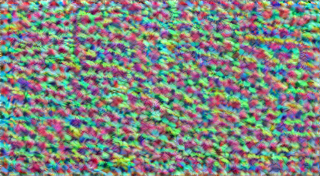

iter: 10, loss: 1.65459, losses: 0.816918, 0.837668
iter: 20, loss: 1.53048, losses: 0.759898, 0.77058


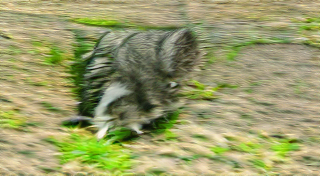

iter: 30, loss: 1.46407, losses: 0.733531, 0.73054
iter: 40, loss: 1.4559, losses: 0.732752, 0.723152


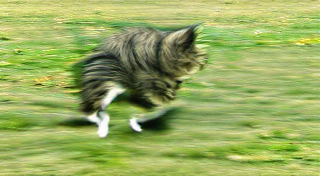

iter: 50, loss: 1.46607, losses: 0.738105, 0.727963
iter: 60, loss: 1.44878, losses: 0.730568, 0.718216


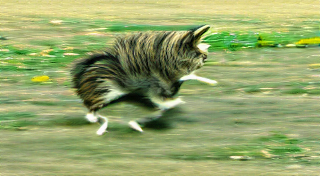

iter: 70, loss: 1.42875, losses: 0.718986, 0.70976
iter: 80, loss: 1.43553, losses: 0.726509, 0.709026


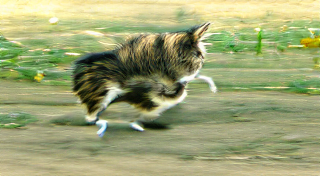

iter: 90, loss: 1.38965, losses: 0.697361, 0.692286
iter: 100, loss: 1.41227, losses: 0.713673, 0.698602


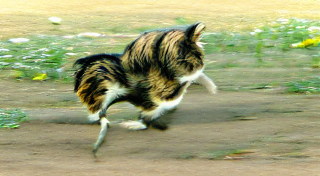

iter: 110, loss: 1.43223, losses: 0.721942, 0.71029
iter: 120, loss: 1.42083, losses: 0.716132, 0.7047


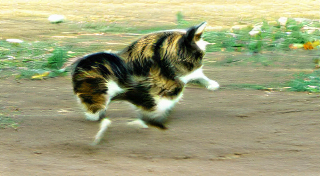

iter: 130, loss: 1.41191, losses: 0.712371, 0.699539
iter: 140, loss: 1.39559, losses: 0.700491, 0.695104


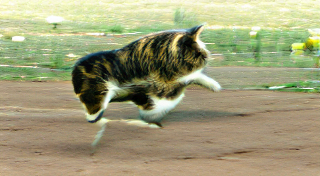

iter: 150, loss: 1.35528, losses: 0.685173, 0.67011
iter: 160, loss: 1.3999, losses: 0.707703, 0.692193


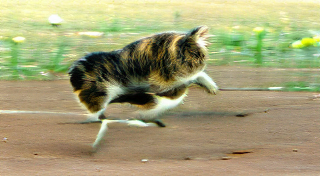

iter: 170, loss: 1.40313, losses: 0.707896, 0.695233
iter: 180, loss: 1.39115, losses: 0.706037, 0.685116


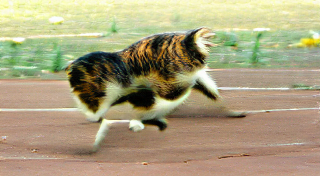

iter: 190, loss: 1.34991, losses: 0.685184, 0.664725
iter: 200, loss: 1.35041, losses: 0.684518, 0.665887


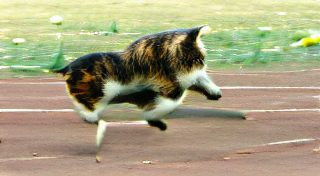

iter: 210, loss: 1.39239, losses: 0.705854, 0.686538
iter: 220, loss: 1.34966, losses: 0.681766, 0.667897


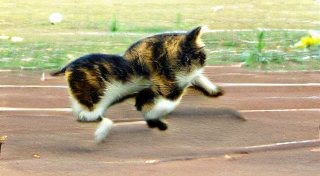

iter: 230, loss: 1.39259, losses: 0.70496, 0.687626
iter: 240, loss: 1.36425, losses: 0.692571, 0.671683


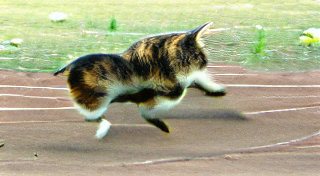

In [14]:
import clipit
import gc
gc.collect()

# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "a cat running"
# You can trade off speed for quality: draft, normal, better, best
quality = "normal"
# Aspect ratio: widescreen, square
aspect = "widescreen"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)